## Wprowadzenie do Pytorcha
Zanim przejdziemy do sieci neuronowych przyjrzymy się bilżej bibliotece PyTorch. Jest to biblioteka open source tworzona i wspierana przez firmę Facebook. Umożliwia ona sprawne zbudowanie modeli i ich trenowanie dzięki m. in. wbudowanym mechanizmom automatycznego różniczkowania.

Konkurencyjnym rozwiązaniem są biblioteki Tensorflow oraz Keras (ta druga jest wysokopoziomowym API przeznaczonym m. in. do budowania sieci neuronowych). Jest to rozwiązanie wspierane przez Google, którego pierwsza wersja została wydana w 2015 roku.

Można zauważyć, że Keras jest częściej stosowany do celów produkcyjnych, a PyTorch do celów naukowych, lecz wiele zależy od osobistych preferencji.

Jeżeli chcesz się dowiedzieć więcej o automatycznym różniczkowaniu, to zajrzyj tutaj (notebook w języku angielskim): https://drive.google.com/file/d/1nZFPdZIN6YtzSFqmnMiZmkqgPzjxifDY/view?usp=sharing

## Metoda gradientowego spadku - przypomnienie

![](https://miro.medium.com/max/700/1*yasmQ5kvlmbYMe8eDkyl6w.png)

Źródło ilustracji: https://miro.medium.com/max/700/1*yasmQ5kvlmbYMe8eDkyl6w.png

Niech: <br>
 $X^t \in \mathbb{R}^{n}$, <br>
 $ f:\mathbb{R}^{n} \rightarrow \mathbb{R}$ <br>
 Krok gradientowego spadku dla kroku **t** wygląda następująco:

$$ X^{t + 1} = X^{t} - \eta \frac{\partial f(X^t)}{\partial X} = X^{t} - \eta \cdot grad (f(X^t)) $$

Gdzie $\eta$ jest parametrem zwanym learning rate.

## Podstawowe operacje na tensorach

In [1]:
import torch

a = torch.Tensor([1,2,3])
print(3 * a)
print(a ** a)
print(a * a)
print(a @ a)
b = torch.Tensor([[1,2,3], [4,5,6], [10, 11, 12]])

print(b[1:3,0:2])

print(b + a)

print(a[1].item())


tensor([3., 6., 9.])
tensor([ 1.,  4., 27.])
tensor([1., 4., 9.])
tensor(14.)
tensor([[ 4.,  5.],
        [10., 11.]])
tensor([[ 2.,  4.,  6.],
        [ 5.,  7.,  9.],
        [11., 13., 15.]])
2.0


## Przykład - regresja liniowa

In [3]:
from torch.autograd import Variable
import torch.optim as optim
import numpy as np

def linear_model(x, W, b):
    return x*W + b

data, targets = torch.Tensor([[1],[2],[3]]), torch.Tensor([3,5,7])

W = Variable(torch.randn(1), requires_grad=True)
b = Variable(torch.randn(1), requires_grad=True)
epochs = 10

optimizer = optim.SGD([W, b], lr=0.000001)
# optimizer = optim.Adam([W, b])

for epoch in range(epochs):
    epoch_loss = 0
    for sample, target in zip(data, targets):

        optimizer.zero_grad()
        output = linear_model(sample, W, b)
        loss = (output - target) ** 2
        epoch_loss += loss.item()
        loss.backward()
        optimizer.step()
    print(epoch_loss)

98.87383460998535
98.86727905273438
98.86072206497192
98.85416650772095
98.8476152420044
98.84106016159058
98.8345046043396
98.82795333862305
98.82139825820923
98.81484794616699


## Zadanie 1.

Po uruchumieniu algorytmu funkcja kosztu dosyć wolno spada. Potrzeba wielu epok aby osiągnąć satysfakcjonujący wynik. Zaproponuj rozwiązanie, które przyspieszy uczenie się.

Co się stanie po zakomentowaniu optimizer.zero_grad()? Dlaczego wykorzytujemy tę funkcję?

## Perceptron - najprostsza sieć neuronowa
![](https://upload.wikimedia.org/wikipedia/commons/8/8c/Perceptron_moj.png)

Najprostsza sieć neuronowa składa się pewnej ilości wag ($w_1,...,w_n$) i funkcji aktywacji.

Wyobraźmy sobie następujący problem: mamy dane dotyczące pacjentów - wyniki badań, wiek, wagę itp. Chcemy stworzyć klasyfikator - funkcję, która na wejście przyjmie dane pancjentów, a na wyjście zwróci 2 możliwe wartości: 0 - pacjent chory, 1 - pacjent zdrowy.

Nasze dane możemy oznaczyć jako $x_1,...,x_n$. Nasza sieć zadziałałaby następująco: Przemnażamy każdą z tych danych pacjenta przez odpowiadającą mu wagę ($w_i$) i sumujemy. Jeżeli suma jest powyżej pewnego progu zwracamy 1, a jeżeli poniżej to 0.

W ogólności:
$$f(x)=a\left(\sum_{i=1}^nw_ix_i+b\right)$$

Gdzie a jest tzw. funkcją aktywacji.

Pojawia się jeszcze pytanie - jak dobrać wagi?

## Zadanie 2.
Uzupełnij implementację jednowarstwowego perceptronu z funkcją aktywacji sigmoid.

Funkcja sigmoidalna dana jest wzorem $f(x)=\frac{1}{1+e^{-x}}$

In [4]:
def sigmoid(x):
    return 1 / (1+torch.exp(-x))

data = torch.Tensor([[1,-2], [-1, 2], [1,1], [-4,-7]])
values = torch.Tensor([1,0,0,1])
weights = Variable(torch.randn(2), requires_grad=True)
bias = Variable(torch.randn(1), requires_grad=True)

def network_model(x, weights, bias):
    return sigmoid(weights @ x + bias)

epochs = 10
optimizer = optim.Adam([weights, bias], lr=0.01)

for epoch in range(epochs):
    epoch_loss = 0
    for sample, target in zip(data, values):
        optimizer.zero_grad()
        output = network_model(sample, weights, bias)
        loss = (output - target) ** 2
        epoch_loss += loss.item()
        loss.backward()
        optimizer.step()
    print(weights)
    print(bias)
    print(epoch_loss)

tensor([-1.4930,  0.0228], requires_grad=True)
tensor([0.0034], requires_grad=True)
1.4340365286534507
tensor([-1.4670, -0.0081], requires_grad=True)
tensor([0.0022], requires_grad=True)
1.385756105407836
tensor([-1.4416, -0.0383], requires_grad=True)
tensor([-0.0001], requires_grad=True)
1.3421916798642997
tensor([-1.4164, -0.0684], requires_grad=True)
tensor([-0.0028], requires_grad=True)
1.2979824996218667
tensor([-1.3910, -0.0987], requires_grad=True)
tensor([-0.0056], requires_grad=True)
1.2524443078768854
tensor([-1.3653, -0.1291], requires_grad=True)
tensor([-0.0084], requires_grad=True)
1.205395786950021
tensor([-1.3394, -0.1596], requires_grad=True)
tensor([-0.0113], requires_grad=True)
1.1568300060150705
tensor([-1.3132, -0.1904], requires_grad=True)
tensor([-0.0142], requires_grad=True)
1.106846161400199
tensor([-1.2867, -0.2214], requires_grad=True)
tensor([-0.0170], requires_grad=True)
1.0556263894029598
tensor([-1.2600, -0.2524], requires_grad=True)
tensor([-0.0198], requ

## Twierdzenie o uniwersalnej aproksymacji

Tw. (Cybenko, 1989). Niech F będzie ciągłą funkcją sigmoidalną. Skończone sumy postaci $$G(x)=\sum_{j=1}^Nα_jF(w_jx+θ_j)$$ są gęste w przestrzeni funkcji ciągłych n zmiennych na kostce jednostkowej.

Innymi słowy - mając sieć z jedną warstwą z sigmoidalną funkcją aktywacji możemy wraz dowolnie dużą ilością neuronów w tej warstwie przbliżać funkcję ciągłą z wartościami [0,1] z dowolnie dużą dokładnością.

W bardziej ogólnej wersji to twierdzenie dotyczy funkcji aktywacji F które są ciągłe i ograniczone. W szczególności mając wielowarstwową sieć o funkcjach liniowych w ostatniej warstwie (ale ograniczone i ciągłe między warstwami) możemy przybliżać dowolną funkcję ciągłą.

Jednym z nowszych odkryć (Patrick Kidger, Terry Lyons, 2020) jest twierdzenie, że to dotyczy ciągłych funkcji aktywacji nieafinicznych o ciągłej pochodnej w co najmniej jednym punkcie, przy czym istnieje punkt mający pochodną różną od 0.



![](https://www.researchgate.net/profile/Facundo_Bre/publication/321259051/figure/fig1/AS:614329250496529@1523478915726/Artificial-neural-network-architecture-ANN-i-h-1-h-2-h-n-o.png)

## Funkcje aktywacji
Niegdyś najczęściej używaną funkcją aktywacji był sigmoid. Obecnie najczęściej używaną funkcją aktywacji jest ReLu. Wyraża się wzorem:
$$f(x)=\max(0,x)$$

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

device = "cuda"


class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.fc0 = nn.Linear(28*28, 920)
        self.fc1 = nn.Linear(920, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc0(x)
        x = F.relu(x)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output


def train(model, train_loader, optimizer, epoch):
    model.train()
    log_interval = 100
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.cross_entropy(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])
dataset1 = datasets.MNIST('../data', train=True, download=True,
                    transform=transform)
dataset2 = datasets.MNIST('../data', train=False,
                    transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1, batch_size=100)
test_loader = torch.utils.data.DataLoader(dataset2, batch_size=100)

model = Network().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01)
epochs = 3

for epoch in range(1, epochs + 1):
    train(model, train_loader, optimizer, epoch)
    test(model, test_loader)

100%|██████████| 9912422/9912422 [00:00<00:00, 102285324.41it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 18974889.38it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 26204598.37it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14688148.63it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.280176
Train Epoch: 1 [10000/60000 (17%)]	Loss: 0.236152
Train Epoch: 1 [20000/60000 (33%)]	Loss: 0.287113
Train Epoch: 1 [30000/60000 (50%)]	Loss: 0.286522
Train Epoch: 1 [40000/60000 (67%)]	Loss: 0.186919
Train Epoch: 1 [50000/60000 (83%)]	Loss: 0.234267

Test set: Average loss: 0.2626, Accuracy: 9312/10000 (93%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.116797
Train Epoch: 2 [10000/60000 (17%)]	Loss: 0.285550
Train Epoch: 2 [20000/60000 (33%)]	Loss: 0.169965
Train Epoch: 2 [30000/60000 (50%)]	Loss: 0.160395
Train Epoch: 2 [40000/60000 (67%)]	Loss: 0.068230
Train Epoch: 2 [50000/60000 (83%)]	Loss: 0.118257

Test set: Average loss: 0.2190, Accuracy: 9489/10000 (95%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.143920
Train Epoch: 3 [10000/60000 (17%)]	Loss: 0.361982
Train Epoch: 3 [20000/60000 (33%)]	Loss: 0.267700
Train Epoch: 3 [30000/60000 (50%)]	Loss: 0.269744
Train Epoch: 3 [

## Zadanie 3.
Uruchom obliczenia na karcie graficznej. Czy widoczne jest przyspieszenie?

Pamiętaj! Aby model działał na karcie graficznej musisz go tam umieścić za pomocą polecenia .cuda(). Musisz wywołać to na klasie modelu jak i na tenasorach danych!

## Zadanie 4.
Stwórz w używanym przez siebie edytorze graficznym cyfrę podobną do zestawu mnist, a następnie dokonaj predykcji za pomocą swojej sieci. Czy predykcja jest poprawna?

In [6]:
import os
os.getcwd()

'/content'

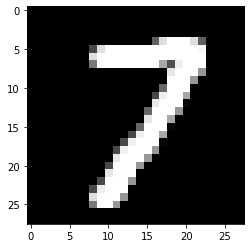

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("cyfra.png").convert('L')
plt.imshow(np.reshape(img, (28,28)), cmap=plt.cm.gray)

In [ ]:
output = model(transform(img).to(device).reshape(1,1,28,28))
output.argmax()

tensor(7, device='cuda:0')

## Sieci konwolucyjne

![](https://miro.medium.com/max/500/1*YvlCSNzDEBGEWkZWNffPvw.gif)
![](https://miro.medium.com/max/500/1*gXAcHnbTxmPb8KjSryki-g.gif)
![](https://miro.medium.com/max/500/1*34_365CJB5seboQDUrbI5A.gif)
![](https://miro.medium.com/max/500/1*WpOcRWlofm0Z0EDUTKefzg.gif)

## Max pooling

![](https://miro.medium.com/max/500/1*kW4HcS4zFxoKv6R4xtqFlg.gif)
![](https://miro.medium.com/max/500/1*LjXV6eQKTQcg-PJnBRE0VA.gif)

Źródło ilustracji: https://towardsdatascience.com/a-visualization-of-the-basic-elements-of-a-convolutional-neural-network-75fea30cd78d

## Więcej kanałów?

![](https://wiki.pathmind.com/images/wiki/karpathy-convnet-labels.png)

Źródło: https://wiki.pathmind.com/images/wiki/karpathy-convnet-labels.png


## Zadanie 5.
Napisz funkcję, która dla podanych wartości wysokości, szerokości, rozmiaru filtra, paddingu i stride'u zwróci rozmiar wyjściowy. Zakładamy dzielenie całkowite (//) w sytuacji gdy mielibyśmy uzyskać wynik niecałkowity - jak kolejne umieszczenie filtra się nie zmieści, to pomijamy je.

In [ ]:
def calc_result(height: int, width: int, kernel_size: int, padding: int, stride: int):
    output_height = (height + 2 * padding - kernel_size) // stride + 1
    output_width = (width + 2 * padding - kernel_size) // stride + 1
    return output_height, output_width

assert calc_result(4, 4, 2, 0, 1) == (3,3)
assert calc_result(10, 8, 3, 1, 2) == (5,4)
assert calc_result(2, 6, 2, 1, 2) == (2,4)
calc_result(26,26,3,0,1)

(24, 24)

## Zadanie 6.
Uzyskujemy wyniki powyżej 90%, to możemy potranować na czymś trudniejszym. Użyjmy zbioru CIFAR10, jest to zbiór zdjęć 32x32 kolorowych (3 kanały: czerwony, niebieski i zielony) podzielonych na 10 klas. Dostosuj poniższy model tak, aby umożliwić trening na tym zbiorze - podobnie jak dla MNIST są gotowe klasy pobierające ten zbiór.

Wskazówka: parametry do normalizacji: (0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

device = "cuda"
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 16, 3, 1)
        self.pool = nn.MaxPool2d(3, 3)
        self.fc1 = nn.Linear(1296, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        x = torch.flatten(x,1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output


transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])
dataset1 = datasets.CIFAR10('../data', train=True, download=True,
                    transform=transform)
dataset2 = datasets.CIFAR10('../data', train=False,
                    transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1, batch_size=100)
test_loader = torch.utils.data.DataLoader(dataset2, batch_size=100)

model = Network().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01)
epochs = 3

for epoch in range(1, epochs + 1):
    train(model, train_loader, optimizer, epoch)
    test(model, test_loader)

Files already downloaded and verified
Train Epoch: 1 [0/50000 (0%)]	Loss: 2.287536
Train Epoch: 1 [10000/50000 (20%)]	Loss: 2.301362
Train Epoch: 1 [20000/50000 (40%)]	Loss: 2.302276
Train Epoch: 1 [30000/50000 (60%)]	Loss: 2.297142
Train Epoch: 1 [40000/50000 (80%)]	Loss: 2.311600

Test set: Average loss: 2.3032, Accuracy: 1000/10000 (10%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 2.309360
Train Epoch: 2 [10000/50000 (20%)]	Loss: 2.298872
Train Epoch: 2 [20000/50000 (40%)]	Loss: 2.302567
Train Epoch: 2 [30000/50000 (60%)]	Loss: 2.297497
Train Epoch: 2 [40000/50000 (80%)]	Loss: 2.311203

Test set: Average loss: 2.3033, Accuracy: 1000/10000 (10%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 2.309851
Train Epoch: 3 [10000/50000 (20%)]	Loss: 2.298931
Train Epoch: 3 [20000/50000 (40%)]	Loss: 2.302460
Train Epoch: 3 [30000/50000 (60%)]	Loss: 2.297496
Train Epoch: 3 [40000/50000 (80%)]	Loss: 2.311224

Test set: Average loss: 2.3033, Accuracy: 1000/10000 (10%)



## Autoenkodery
Są to sieci o specjalnej architekturze - rozmiar ich wejścia jest równy rozmiarowi wyjścia.

![](https://miro.medium.com/max/1000/0*uq2_ZipB9TqI9G_k)

Źródło ilustracji: https://miro.medium.com/max/1000/0*uq2_ZipB9TqI9G_k

Można je zastosować m. in. do kompresji (stratnej), detekcji anomalii, czy część zwaną dekoderem wykorzystać do generowania nowych przykładów.

## Zadanie 7.
Sprawdź działanie poniższego autoenkodera na przykładzie swojej cyfry - spróbój wyświetlić odtworzoną cyfrę.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms


class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.fc0 = nn.Linear(28*28, 300)
        self.fc1 = nn.Linear(300, 128)
        self.fc2 = nn.Linear(128, 10)
        self.fc3 = nn.Linear(10, 4)
        self.fc4 = nn.Linear(4, 10)
        self.fc5 = nn.Linear(10, 128)
        self.fc6 = nn.Linear(128, 300)
        self.fc7 = nn.Linear(300, 28*28)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc0(x)
        x = F.relu(x)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        x = F.relu(x)
        x = self.fc5(x)
        x = F.relu(x)
        x = self.fc6(x)
        x = F.relu(x)
        x = self.fc7(x)
        output = torch.reshape(x, (-1, 1, 28,28))
        return output


def train(model, train_loader, optimizer, epoch):
    model.train()
    log_interval = 10
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.cuda()
        optimizer.zero_grad()
        output = model(data)
        loss = F.mse_loss(output, data)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, _ in test_loader:
            data = data.cuda()
            output = model(data)
            test_loss += F.mse_loss(output, data).item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f})\n'.format(test_loss))


transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])
dataset1 = datasets.MNIST('../data', train=True, download=True,
                    transform=transform)
dataset2 = datasets.MNIST('../data', train=False,
                    transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1, batch_size=500)
test_loader = torch.utils.data.DataLoader(dataset2, batch_size=500)

model = Network().cuda()
optimizer = optim.Adam(model.parameters(), lr=0.01)
epochs = 30

for epoch in range(1, epochs + 1):
    train(model, train_loader, optimizer, epoch)
    test(model, test_loader)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.972252
Train Epoch: 1 [5000/60000 (8%)]	Loss: 0.853668
Train Epoch: 1 [10000/60000 (17%)]	Loss: 0.781324
Train Epoch: 1 [15000/60000 (25%)]	Loss: 0.669206
Train Epoch: 1 [20000/60000 (33%)]	Loss: 0.727288
Train Epoch: 1 [25000/60000 (42%)]	Loss: 0.734077
Train Epoch: 1 [30000/60000 (50%)]	Loss: 0.704839
Train Epoch: 1 [35000/60000 (58%)]	Loss: 0.660470
Train Epoch: 1 [40000/60000 (67%)]	Loss: 0.652307
Train Epoch: 1 [45000/60000 (75%)]	Loss: 0.635920
Train Epoch: 1 [50000/60000 (83%)]	Loss: 0.578919
Train Epoch: 1 [55000/60000 (92%)]	Loss: 0.566503

Test set: Average loss: 0.0012)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.553821
Train Epoch: 2 [5000/60000 (8%)]	Loss: 0.577829
Train Epoch: 2 [10000/60000 (17%)]	Loss: 0.588549
Train Epoch: 2 [15000/60000 (25%)]	Loss: 0.546305
Train Epoch: 2 [20000/60000 (33%)]	Loss: 0.570592
Train Epoch: 2 [25000/60000 (42%)]	Loss: 0.558130
Train Epoch: 2 [30000/60000 (50%)]	Loss: 0.559335
Train Epoch: 2 [35000/60000 (5

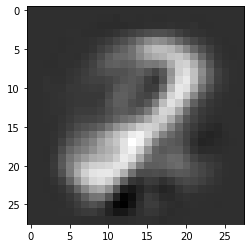

In [ ]:
output = model(transform(img).to(device).reshape(1,1,28,28))
mean = 0.1307
std = 0.3081
output = ((output * std) + mean) * 255
plt.imshow(np.reshape(output.cpu().detach().numpy(), (28,28)), cmap=plt.cm.gray)

## Co dalej?
Jeżeli zainteresował Cię temat sieci neuronowych możesz poszukać jeszcze informacji na poniższe tematy:
 - regularyzacja - czyli jak przeciwdziałać overfittingowi (m. in. dropout, L1, L2, batch normalization),
 - sieci rekurencyjne - czyli jak przyjmować dane o różnej wielkości,
 - VAE (wariacyjny autoenkoder), GAN - czyli jak generować nowe obrazy na podstawie danego zbioru (lepiej niż za pomocą zwykłego autoenkodera),
 - przetwarzanie języka naturalnego - embeddingi: Glove, Word2Vec; model atencji, BERT - czyli jak wyciągnąć coś z tekstu (np. analiza sentymentu - czy dany tekst jest określony pozytywnie, czy negatywnie),
 itp.